In [1]:
import os
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.image as img
from ultralytics import YOLO

%matplotlib inline

In [2]:
ROOT_PATH = Path(os.getcwd()).parent.as_posix()
DATASET_PATH = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/sdd.yaml").as_posix()
RUN_PATH = Path(ROOT_PATH, "runs").as_posix()
PRETRAINED_PATH = Path(ROOT_PATH, "pretrained").as_posix()
TEST_INPUTS_DIR = Path(ROOT_PATH, "datasets/storm-damage-detection/working/sdd/test/images").as_posix()

## Training

In [3]:
model_name = "yolov8x.pt" # yolov8n.pt yolov8s.pt yolov8m.pt yolov8l.pt yolov8x.pt
model = YOLO(model_name, task="detect")
model.info()

YOLOv8x summary: 365 layers, 68229648 parameters, 0 gradients


(365, 68229648, 0, 0.0)

In [4]:
train_results = model.train(
    data=DATASET_PATH, 
    epochs=1000, 
    imgsz=512,
    project=RUN_PATH,
    name="yolov8x-default",
)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/sdd.yaml, epochs=1000, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/home/jovyan/storm-damage-detection/runs, name=yolov8x-default, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=Fal

train: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/train/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 2746. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/valid/labels.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to /home/jovyan/storm-damage-detection/runs/yolov8x-default/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 4 dataloader workers
Logging results to /home/jovyan/storm-damage-detection/runs/yolov8x-default
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000       8.7G      1.799      3.847      1.655        391        512: 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         18        419      0.361      0.204     0.0955     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      9.24G      1.249      1.613      1.239        718        512: 100%|██████████| 9/9 [00:06<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         18        419        0.3      0.165     0.0527      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      9.34G      1.278      1.621      1.247        443        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         18        419     0.0567      0.624     0.0591     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000       9.3G       1.16       1.18      1.181        514        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         18        419      0.104      0.309     0.0871     0.0618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000       9.4G       1.17      1.254      1.206        370        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         18        419     0.0233     0.0951     0.0164     0.0123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      9.34G      1.233      1.267      1.243        399        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         18        419   0.000145    0.00145   7.35e-05   1.84e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      9.28G      1.199       1.14      1.246        439        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         18        419    0.00934     0.0877    0.00632    0.00429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      9.34G      1.227      1.173      1.274        392        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         18        419     0.0965      0.296     0.0638     0.0456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      9.27G      1.245      1.188      1.296        520        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         18        419      0.155      0.189      0.114     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      9.22G       1.17      1.118      1.248        560        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419      0.438      0.105     0.0218     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      9.37G      1.132      1.132       1.21        506        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.455      0.162      0.127      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      9.28G      1.166      1.348      1.253        337        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         18        419    0.00281     0.0188    0.00153   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      9.34G      1.245      1.342      1.286        283        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.085     0.0798     0.0183    0.00957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      9.31G      1.172      1.125      1.205        430        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.222     0.0365     0.0174    0.00621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      9.36G      1.255      1.287      1.283        444        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419   0.000717     0.0232   0.000478   8.31e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      9.31G      1.226      1.128       1.27        388        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         18        419    0.00322     0.0464    0.00191    0.00089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      9.31G      1.141      1.162      1.226        513        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         18        419      0.201      0.294      0.166      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      9.36G      1.081      1.002      1.176        451        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         18        419      0.203       0.58      0.254      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000       9.3G       1.12      1.049      1.215        527        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         18        419      0.229      0.637      0.302        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      9.38G      1.182      1.113      1.239        468        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         18        419      0.515       0.31      0.145      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      9.34G      1.227      1.132      1.292        326        512: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         18        419      0.203      0.451      0.231      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      9.33G       1.14      1.067      1.233        454        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         18        419        0.3      0.301      0.271      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      9.29G       1.15      1.028      1.232        415        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419      0.233      0.459      0.294      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      9.33G      1.068       1.02      1.171        406        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         18        419      0.428      0.412      0.372      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      9.32G      1.108      0.964      1.198        608        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         18        419      0.414      0.367      0.364      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      9.31G      1.095     0.9725      1.183        308        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.316      0.522      0.351      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      9.37G      1.083      1.032      1.203        299        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.677      0.307      0.336      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000       9.4G      1.171      1.101      1.273        437        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         18        419      0.655      0.306      0.349      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      9.27G      1.076      1.027      1.174        555        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         18        419      0.289      0.461      0.309      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000       9.3G      1.055     0.9835      1.175        392        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         18        419      0.437      0.479      0.403      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      9.23G       1.03     0.9173      1.158        335        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         18        419       0.38      0.472      0.392      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      9.42G      1.093     0.9687      1.197        394        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.419       0.55       0.44      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      9.32G      1.098     0.9261      1.199        309        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.424      0.389      0.391      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      9.38G      1.155     0.9164      1.206        707        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         18        419       0.57      0.413      0.464       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      9.31G      1.129     0.9683      1.232        499        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18        419      0.341      0.574      0.428      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000       9.4G      1.109     0.9747      1.212        269        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419      0.333      0.625      0.362      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      9.16G      1.103     0.9581      1.202        312        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         18        419      0.592      0.452      0.371      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      9.37G      1.043     0.8725      1.156        419        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         18        419      0.617      0.407      0.416      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      9.42G      1.024      0.859      1.126        424        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         18        419      0.598      0.337      0.332      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      9.34G     0.9959      0.811       1.12        440        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419      0.429      0.544      0.427      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      9.26G      1.011     0.8484      1.173        574        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      9.33G          1     0.8687      1.139        509        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.334       0.49      0.333      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      9.38G     0.9844     0.8508       1.13        470        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.451      0.553      0.433      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      9.38G     0.9643      0.876      1.106        358        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.375      0.501      0.373      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      9.29G      1.002     0.8709      1.132        607        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.423      0.414      0.371      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000       9.3G     0.9617     0.8207      1.139        477        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.514      0.476       0.41      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      9.25G      1.008     0.9083      1.158        392        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.343       0.56        0.4      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      9.29G      1.008     0.8537      1.146        404        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.565      0.474      0.468      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      9.33G     0.9611     0.7595      1.124        413        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.387      0.444      0.414      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      9.29G       1.01     0.7892      1.147        278        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.495      0.477      0.468      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      9.32G      1.003     0.8188      1.117        321        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419       0.46       0.43      0.443       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      9.33G      1.023     0.7899       1.17        326        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.339       0.46      0.375      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      9.29G     0.9495     0.7549      1.085        355        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18        419      0.522      0.387      0.438      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      9.24G      0.949     0.8097      1.106        335        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.706      0.368      0.428      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      9.29G     0.9452     0.7834      1.105        285        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419       0.36      0.511      0.408      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      9.37G      1.018     0.8716      1.167        488        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.743      0.301      0.348      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      9.27G      0.966     0.7989      1.128        363        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419      0.386      0.435      0.369      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000       9.3G     0.9808      0.797      1.141        368        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.369      0.545      0.417      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      9.39G     0.9325     0.7428      1.104        350        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.408      0.358      0.385      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      9.34G     0.9529     0.7984      1.147        383        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.317      0.596      0.375      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      9.37G     0.9487     0.7401      1.086        352        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419      0.387      0.575      0.397      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      9.26G     0.9923     0.8345      1.146        492        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.515      0.492      0.418      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      8.99G     0.9671     0.7706       1.11        375        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         18        419      0.344       0.59      0.402      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      9.38G     0.9239     0.7877      1.099        463        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419       0.33      0.516      0.378      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      9.23G      0.946     0.8216      1.126        250        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419      0.423      0.553      0.435      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      9.36G     0.9175     0.7412      1.089        493        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18        419      0.398      0.565      0.441       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      9.39G      0.917     0.7188      1.081        442        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.614      0.357      0.435      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      9.39G     0.9299     0.7085      1.083        424        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.461      0.504      0.427      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      9.29G     0.8949     0.7345      1.097        382        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419      0.529      0.432      0.425      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      9.34G     0.8754     0.7198      1.078        375        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.665      0.331      0.386      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      9.38G      0.887     0.7111      1.079        424        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.339      0.395       0.35       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      9.37G     0.8991     0.7227      1.075        383        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.257      0.505      0.313      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000       9.3G     0.9422     0.7839      1.148        308        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.785      0.331      0.398      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      9.36G     0.9002     0.7297      1.062        456        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.504      0.509      0.504      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      9.42G     0.9528     0.7663      1.141        373        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.405      0.421      0.411      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      9.29G     0.9205     0.7407      1.103        387        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419       0.45      0.472      0.461      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      9.24G     0.8764        0.7      1.095        435        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18        419      0.431      0.485      0.452      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      9.32G      0.942     0.7068      1.137        319        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419       0.44      0.388      0.422      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      9.41G     0.9115     0.6999      1.091        404        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.393      0.397        0.4      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      9.36G       0.92     0.7136      1.097        307        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.536       0.39      0.406      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000       9.3G     0.8951      0.695      1.093        398        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419       0.43      0.561      0.421      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      9.31G     0.9304     0.6766      1.088        455        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.484      0.464      0.452       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      9.35G     0.8686     0.6859       1.08        522        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.535      0.483      0.477      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000       9.4G     0.8492     0.7025      1.064        416        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.541      0.439      0.478      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      9.27G     0.8389     0.6269      1.043        396        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18        419      0.364      0.607      0.402      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      9.34G     0.8303     0.6096      1.042        567        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.546      0.435      0.464      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      9.31G     0.8744     0.6492      1.087        430        512: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.419      0.501      0.463      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      9.29G     0.8319     0.6469      1.047        349        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.386      0.539      0.446      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      9.24G     0.8772     0.6706      1.091        502        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.387      0.521      0.413      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      9.31G      0.841     0.6268      1.056        456        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.464      0.532       0.47      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      9.33G     0.8354     0.6183       1.05        381        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.462      0.563      0.466      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      9.34G     0.8541     0.6186      1.061        369        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.435      0.554      0.472      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      9.27G     0.8386     0.6335      1.062        297        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.419      0.489      0.442      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      9.31G     0.8103     0.5622      1.028        413        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.522      0.449      0.473       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      9.31G     0.8115     0.5562      1.038        392        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.361      0.501      0.429      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      9.38G     0.8889     0.5997      1.069        487        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.477      0.511      0.429      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      9.29G     0.7985     0.5748      1.041        234        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419      0.492      0.502      0.453      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      9.34G     0.8239      0.555      1.038        448        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.392      0.578      0.454      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      9.28G      0.832     0.5508      1.047        398        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.641      0.403      0.456      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      9.28G     0.8697     0.5709      1.077        410        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.333      0.534      0.378      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      9.28G     0.7986     0.5333      1.026        457        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         18        419      0.373      0.462      0.352       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      9.22G     0.8675     0.5834      1.076        463        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419       0.37      0.487      0.383      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      9.27G     0.8346     0.5795      1.053        295        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         18        419      0.382       0.47      0.409      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      9.29G     0.8332     0.5886      1.058        432        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.428      0.397      0.392      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000       9.3G     0.8632     0.6164       1.07        572        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.408      0.461       0.44       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      9.28G     0.8238      0.606       1.07        317        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         18        419      0.473      0.496      0.458      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      9.37G      0.833     0.5725      1.056        404        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.368      0.492       0.39      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      9.27G     0.7848     0.5334      1.042        442        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.373      0.514      0.423        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      9.37G     0.7977     0.5594      1.044        397        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18        419       0.41      0.534      0.447      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      9.32G     0.7584     0.5318      1.026        450        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.374      0.568      0.482      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      9.31G     0.8152     0.5575       1.03        518        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.344      0.427      0.385      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000       9.4G     0.8401     0.6047      1.053        442        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.386      0.417       0.39      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      9.29G     0.8543     0.6135      1.051        447        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419        0.4      0.544      0.382      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      9.27G     0.8486     0.5841      1.067        381        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.459       0.53      0.423      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      9.27G     0.8181      0.536      1.028        410        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.563      0.392      0.389      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      9.38G     0.8807     0.6028      1.073        369        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.449      0.399        0.4       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      9.22G     0.8242     0.5845      1.042        378        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         18        419      0.385      0.563      0.415      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      9.31G     0.8088     0.5636       1.02        404        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.385      0.636      0.446      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      9.29G      0.797     0.5302      1.026        548        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.501      0.489      0.468      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      9.28G     0.7901      0.518      0.996        559        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.378      0.568       0.42      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      9.35G     0.8334     0.5355      1.031        418        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         18        419      0.486       0.45      0.398      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      9.37G     0.7817     0.5133      1.014        496        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.375      0.557      0.412      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      9.39G     0.7891     0.5058      1.019        384        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.412      0.498      0.418      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      9.34G     0.7898     0.5141      1.027        410        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.468      0.516       0.46      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      9.34G     0.7493       0.48      1.006        569        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.421      0.629      0.457       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      9.28G     0.7791     0.4903      1.022        515        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.434      0.446      0.424      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      9.28G     0.7699     0.5194       1.03        363        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.462      0.479      0.453      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      9.37G     0.7823     0.5203     0.9981        444        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         18        419      0.312      0.515       0.39      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      9.25G     0.7955     0.5114      1.024        549        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.346      0.711      0.398       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      9.31G     0.7606     0.4799      1.006        559        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419      0.353       0.49      0.388      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000       9.4G     0.7484     0.4938      1.001        533        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.405      0.446      0.396      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      9.32G      0.816     0.5501      1.058        439        512: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.368      0.498      0.368      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      9.24G     0.7821      0.508      1.017        389        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.415      0.514      0.411      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      9.27G     0.7498     0.4903          1        426        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.488      0.472      0.411        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      9.29G     0.7628     0.4975     0.9944        581        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         18        419      0.406      0.462      0.397      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      9.32G     0.7385     0.4854      0.987        421        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.307      0.493      0.388      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      9.29G      0.738     0.4833     0.9985        440        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.373      0.528      0.415      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      9.28G     0.7461     0.4889      1.022        443        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         18        419      0.427      0.558      0.446      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000       9.3G     0.7269     0.4767     0.9924        575        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.408      0.401        0.4      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      9.31G     0.7213     0.4581     0.9882        385        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.385       0.54      0.422      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      9.27G     0.7353     0.4749      1.006        395        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419       0.54      0.427      0.439      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      9.37G     0.7425     0.4879          1        366        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.428      0.469      0.435       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      9.17G     0.7192     0.4648     0.9799        379        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         18        419      0.357      0.606      0.434      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      9.33G     0.7189     0.4608     0.9848        361        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.388      0.538      0.437      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      9.33G     0.7352     0.4865     0.9969        474        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.476      0.356       0.41      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      9.17G      0.724     0.4557     0.9948        352        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.331      0.455      0.383      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000       9.3G     0.7118     0.4549     0.9786        460        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         18        419      0.355      0.449      0.381      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      9.25G      0.732     0.5057     0.9976        287        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         18        419      0.281      0.503      0.307      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      9.27G     0.7366     0.4788      0.994        395        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.415      0.402      0.368      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      9.35G     0.6764     0.4274     0.9488        439        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         18        419      0.361      0.528      0.363      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      9.27G     0.7267     0.4878     0.9856        450        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18        419      0.388      0.537      0.371      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      9.36G     0.7148     0.4926     0.9882        409        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.377      0.527       0.37      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      9.34G     0.7296     0.4719     0.9894        300        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         18        419      0.328      0.556      0.397      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      9.29G     0.7344     0.4778     0.9878        417        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.388      0.485      0.383      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      9.25G     0.7363     0.5046      1.013        315        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.383      0.513      0.394      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      9.32G     0.7157     0.4683     0.9856        330        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.444      0.396      0.423      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      9.24G     0.6936     0.4307     0.9606        415        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419       0.35      0.382      0.395      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      9.34G      0.687     0.4378     0.9729        356        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.286      0.475      0.373      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      9.34G     0.7339     0.4611     0.9977        334        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         18        419      0.376      0.455      0.388      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      9.29G     0.6908     0.4373     0.9728        563        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18        419       0.36      0.447      0.376      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      9.29G     0.6993     0.4559     0.9968        413        512: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         18        419      0.426      0.493      0.397      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      9.29G     0.6689     0.4305     0.9736        347        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.392      0.432       0.38      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      9.32G     0.6632     0.4285     0.9623        395        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         18        419      0.385      0.454      0.399      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      9.41G     0.6871     0.4315     0.9643        543        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         18        419      0.412      0.511      0.408      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      9.26G     0.6848     0.4327     0.9739        337        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18        419      0.417      0.413      0.394      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      9.36G     0.6642     0.4272     0.9462        497        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.363      0.603      0.431       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      9.27G     0.6623      0.423     0.9582        275        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.374      0.546      0.405      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      9.38G     0.6869     0.4324     0.9681        500        512: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.491      0.457      0.403      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      9.35G      0.653     0.4215     0.9524        485        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         18        419      0.529      0.386      0.427      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      9.37G     0.6858     0.4397      0.979        447        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.401      0.459      0.379      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      9.41G     0.6722     0.4253     0.9732        471        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.455      0.412      0.408      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      9.34G     0.6921     0.4441     0.9653        442        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         18        419      0.441      0.449      0.389      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      9.27G     0.6971     0.4821     0.9856        199        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18        419      0.391      0.402      0.371      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      9.36G     0.6831      0.441     0.9737        355        512: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         18        419      0.414      0.388      0.351       0.25
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 74, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



174 epochs completed in 0.878 hours.
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/yolov8x-default/weights/last.pt, 136.7MB
Optimizer stripped from /home/jovyan/storm-damage-detection/runs/yolov8x-default/weights/best.pt, 136.7MB

Validating /home/jovyan/storm-damage-detection/runs/yolov8x-default/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


                   all         18        419      0.505      0.509      0.505      0.369
{0: 'damagedcommercialbuilding'}         18          9      0.534      0.333      0.397      0.286
{1: 'damagedresidentialbuilding'}         18         42      0.527      0.238      0.301      0.205
{2: 'undamagedcommercialbuilding'}         18         23      0.273      0.604      0.461      0.339
{3: 'undamagedresidentialbuilding'}         18        345      0.684      0.861      0.861      0.646
Speed: 0.1ms preprocess, 17.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/yolov8x-default


## Evaluation

In [5]:
# Getting some paths right
save_dir = train_results.save_dir

In [6]:
print(f"mAP with IoU 50% = {train_results.box.map50}") 
# 0.5048088586830419

mAP with IoU 50% = 0.5048088586830419


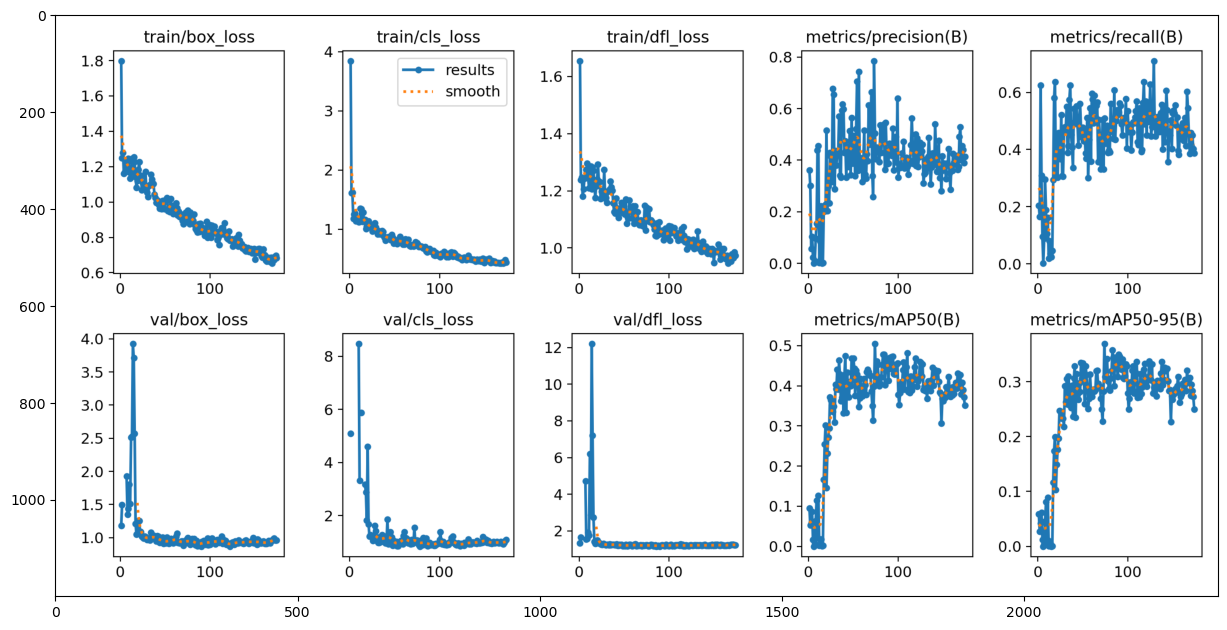

In [7]:
plt.figure(figsize=(15, 10))
results = img.imread(Path(save_dir, "results.png"))   
plt.imshow(results) 
plt.show()

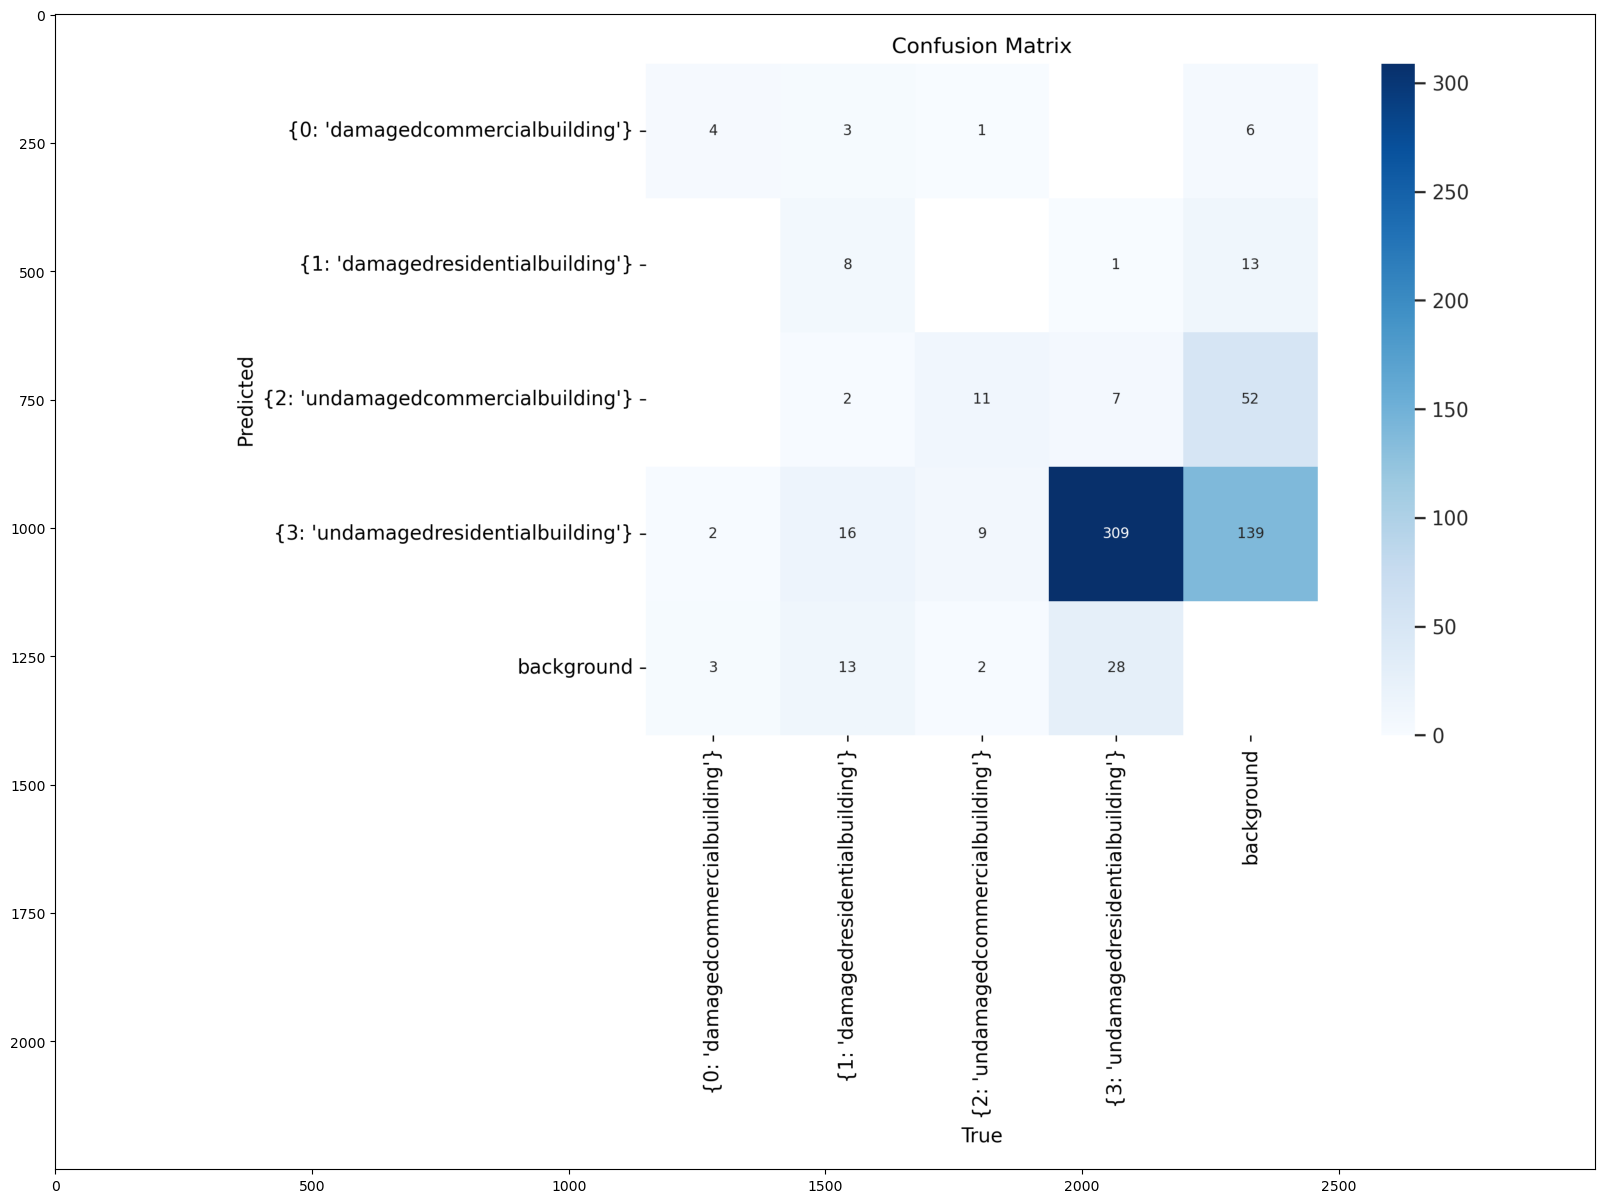

In [8]:
plt.figure(figsize=(20,15))  
# reading the image 
cf = img.imread(Path(save_dir, "confusion_matrix.png")) 
# displaying the image 
plt.imshow(cf) 
plt.show()

## Testing

In [9]:
results_dir = Path(save_dir, "submission_data"); os.makedirs(results_dir, exist_ok=True) # directory to store test output data
best_path = Path(save_dir, "weights/best.pt")

# Double-check with train_results.names
decoding_of_predictions = {0: 'damagedcommercialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'undamagedresidentialbuilding'}

# Load the current best model
model = YOLO(best_path)

In [10]:
test_results = model.val(
    split="test",
    imgsz=512,
    conf=0.25,
    iou=0.5,
    project=RUN_PATH,
)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.13 torch-2.2.1 CUDA:0 (Tesla T4, 15978MiB)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients


val: Scanning /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


                   all         12        234      0.408      0.541       0.41      0.304
{0: 'damagedcommercialbuilding'}         12         15      0.353        0.4      0.287      0.158
{1: 'damagedresidentialbuilding'}         12         42      0.545      0.286      0.353      0.245
{2: 'undamagedcommercialbuilding'}         12         20      0.194        0.6       0.26      0.223
{3: 'undamagedresidentialbuilding'}         12        157      0.539      0.879       0.74      0.589
Speed: 0.2ms preprocess, 40.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /home/jovyan/storm-damage-detection/runs/val


In [11]:
test_results = model.predict(
    TEST_INPUTS_DIR,
    imgsz=512, iou=0.5, conf=0.25, 
    save=True, save_txt=True, project=RUN_PATH,
)


image 1/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_001_jpg.rf.816958fdf5bd6099b8a5e2b668d007e9.jpg: 512x512 3 {0: 'damagedcommercialbuilding'}s, 2 {1: 'damagedresidentialbuilding'}s, 7 {2: 'undamagedcommercialbuilding'}s, 25 {3: 'undamagedresidentialbuilding'}s, 54.4ms
image 2/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_002_jpg.rf.23111ea1920da9b374c3919e1f423dcd.jpg: 512x512 2 {0: 'damagedcommercialbuilding'}s, 2 {1: 'damagedresidentialbuilding'}s, 13 {3: 'undamagedresidentialbuilding'}s, 52.5ms
image 3/12 /home/jovyan/storm-damage-detection/datasets/storm-damage-detection/working/sdd/test/images/Validation_Post_Event_003_jpg.rf.6f70407de0a1ee2cd0f1c8008387e696.jpg: 512x512 4 {0: 'damagedcommercialbuilding'}s, 2 {1: 'damagedresidentialbuilding'}s, 1 {2: 'undamagedcommercialbuilding'}, 11 {3: 'undamagedresidentialbuilding'}s, 50.9ms
image 4

In [12]:
for r in test_results:
    confidences = r.boxes.conf.cpu().numpy().tolist()
    class_indices = r.boxes.cls.cpu().numpy().tolist()
    class_names = [decoding_of_predictions[int(clss_ix)] for clss_ix in class_indices]
    bounding_boxes = r.boxes.xyxy.cpu().numpy()

    # Check if bounding boxes, confidences and class names match
    if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
        print("Error: Number of bounding boxes, confidences, and class names should be the same.")
        continue
    
    text_file_name = os.path.splitext(os.path.basename(r.path))[0] # Get the img filename
    text_file_name = text_file_name.split(".")[0].rstrip("_jpg") # remove extra info in filename produced by roboflow

    # Creating a new .txt file for each image in the submission_directory
    with open(Path(results_dir, f"{text_file_name}.txt"), "w") as file:
        for i in range(len(bounding_boxes)):
            # Get coordinates of each bounding box
            left, top, right, bottom = bounding_boxes[i]
            # Write content to file in desired format
            file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
    print("Output files generated successfully.")
    

Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.
Output files generated successfully.


In [13]:
# Define your source directory and the destination where the zip file will be created
destination_zip = Path(results_dir.parent, "submission")

print("source", results_dir)
print("dest", destination_zip)

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', results_dir)

print(f"Directory {results_dir} has been successfully zipped into {destination_zip}.")

source /home/jovyan/storm-damage-detection/runs/yolov8x-default/submission_data
dest /home/jovyan/storm-damage-detection/runs/yolov8x-default/submission
Directory /home/jovyan/storm-damage-detection/runs/yolov8x-default/submission_data has been successfully zipped into /home/jovyan/storm-damage-detection/runs/yolov8x-default/submission.
